In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
#Ignore warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
'''
1.name: Name or identifier of the asteroid.
2.absolute_magnitude_h: Absolute magnitude of the asteroid, indicating its brightness.
3.est_diameter: Estimated diameter of the asteroid in kilometers.
4.potentially_hazardous: Binary indicator (True/False) if the asteroid is potentially hazardous to Earth.
5.approach_date: Date of closest approach of the asteroid to Earth.
6.miss_distance: Miss distance of the closest approach in astronomical units (AU).
7.orbiting_body: The celestial body (e.g., Earth) that the asteroid orbits or approaches.
8.orbit_id: Unique identifier representing the orbit of the asteroid.
9.orbit_class: Classification of the asteroid's orbit (e.g., Apollo, Amor, Aten).
10.pha: Another binary indicator (True/False) for potentially hazardous asteroids.
11.epoch_mjd: Epoch in Modified Julian Date (MJD) format.
12.epoch_cal: Epoch in Gregorian calendar format.
13.equinox: Equinox date or reference.
14.semi_major_axis: Semi-major axis of the asteroid's orbit.
15.eccentricity: Eccentricity of the asteroid's orbit.
16.periapsis_distance: Periapsis distance (closest distance to the Sun in the asteroid's orbit).
17.period: Orbital period of the asteroid.
18.synodic_period: Synodic period of the asteroid's orbit.
19.mean_motion: Mean motion of the asteroid.
20.inclination: Inclination of the asteroid's orbit with respect to the ecliptic plane.
21.asc_node_longitude: Longitude of the ascending node of the asteroid's orbit.
22.orbital_period: Orbital period of the asteroid.
23.perihelion_distance: Perihelion distance (closest distance to the Sun in the orbit).
24.perihelion_arg: Argument of perihelion.
25.aphelion_distance: Aphelion distance (farthest distance from the Sun in the orbit).
26.perihelion_time: Time of perihelion passage.
27.mean_anomaly: Mean anomaly of the asteroid's orbit.
28.mean_motion: Mean motion of the asteroid.
29.sem_major_axis: Semi-major axis of the asteroid's orbit.
30.eccentricity: Eccentricity of the asteroid's orbit.
31.orbit_class_description: Description of the orbit class.
32.orbit_class_range: Range of the orbit class.
33.orbital_data_arc: Orbital data arc length.
34.orbital_data_observations_used: Number of observations used for orbit determination.
35.orbit_uncertainty: Parameter related to the uncertainty of the asteroid's orbit.
36.minimum_orbit_intersection: Minimum orbit intersection distance (MOID) with Earth's orbit.
37.jupiter_tisserand_invariant: Jupiter Tisserand invariant relative to Jupiter.
38.epoch_osculation: Epoch of osculation.
39.first_observation_date: Date of the first observation.
40.last_observation_date: Date of the last observation.
'''

In [143]:
df=pd.read_csv('/kaggle/input/nasa-asteroids-classification/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [144]:
df.shape

(4687, 40)

In [145]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [147]:
df.describe(include=bool)

,Hazardous
count,4687
unique,2
top,False
freq,3932


In [148]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [149]:
df.describe(include=object)

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox
count,4687,4687,4687,4687
unique,777,1,2680,1
top,2016-07-22,Earth,2017-06-21 06:17:20,J2000
freq,18,4687,9,4687


In [150]:
df.duplicated().value_counts()

False    4687
Name: count, dtype: int64

In [151]:
#Finding Numerical Columns
numeric_cols=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        numeric_cols.append(col)
print(f"There are total {len(numeric_cols)} numerical columns in dataset")
print(numeric_cols)

There are total 36 numerical columns in dataset
['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']


In [152]:
#Finding Numerical Columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} numerical columns in dataset")
print(cat_col)

There are total 4 numerical columns in dataset
['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']


In [153]:
#correlation matrix
corr=df.corr(numeric_only=True)    #gives relation between each numeric column
corr

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Name,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Absolute Magnitude,0.602381,0.602381,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424


In [154]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
skewness = numeric_columns.apply(skew)
skewness

Neo Reference ID                -1.102204
Name                            -1.102204
Absolute Magnitude               0.193863
Est Dia in KM(min)              17.664452
Est Dia in KM(max)              17.664452
Est Dia in M(min)               17.664452
Est Dia in M(max)               17.664452
Est Dia in Miles(min)           17.664452
Est Dia in Miles(max)           17.664452
Est Dia in Feet(min)            17.664452
Est Dia in Feet(max)            17.664452
Epoch Date Close Approach       -0.294927
Relative Velocity km per sec     0.887596
Relative Velocity km per hr      0.887596
Miles per hour                   0.887596
Miss Dist.(Astronomical)        -0.102361
Miss Dist.(lunar)               -0.102361
Miss Dist.(kilometers)          -0.102361
Miss Dist.(miles)               -0.102361
Orbit ID                         4.844782
Orbit Uncertainity               0.154712
Minimum Orbit Intersection       1.474513
Jupiter Tisserand Invariant      0.111204
Epoch Osculation                -4

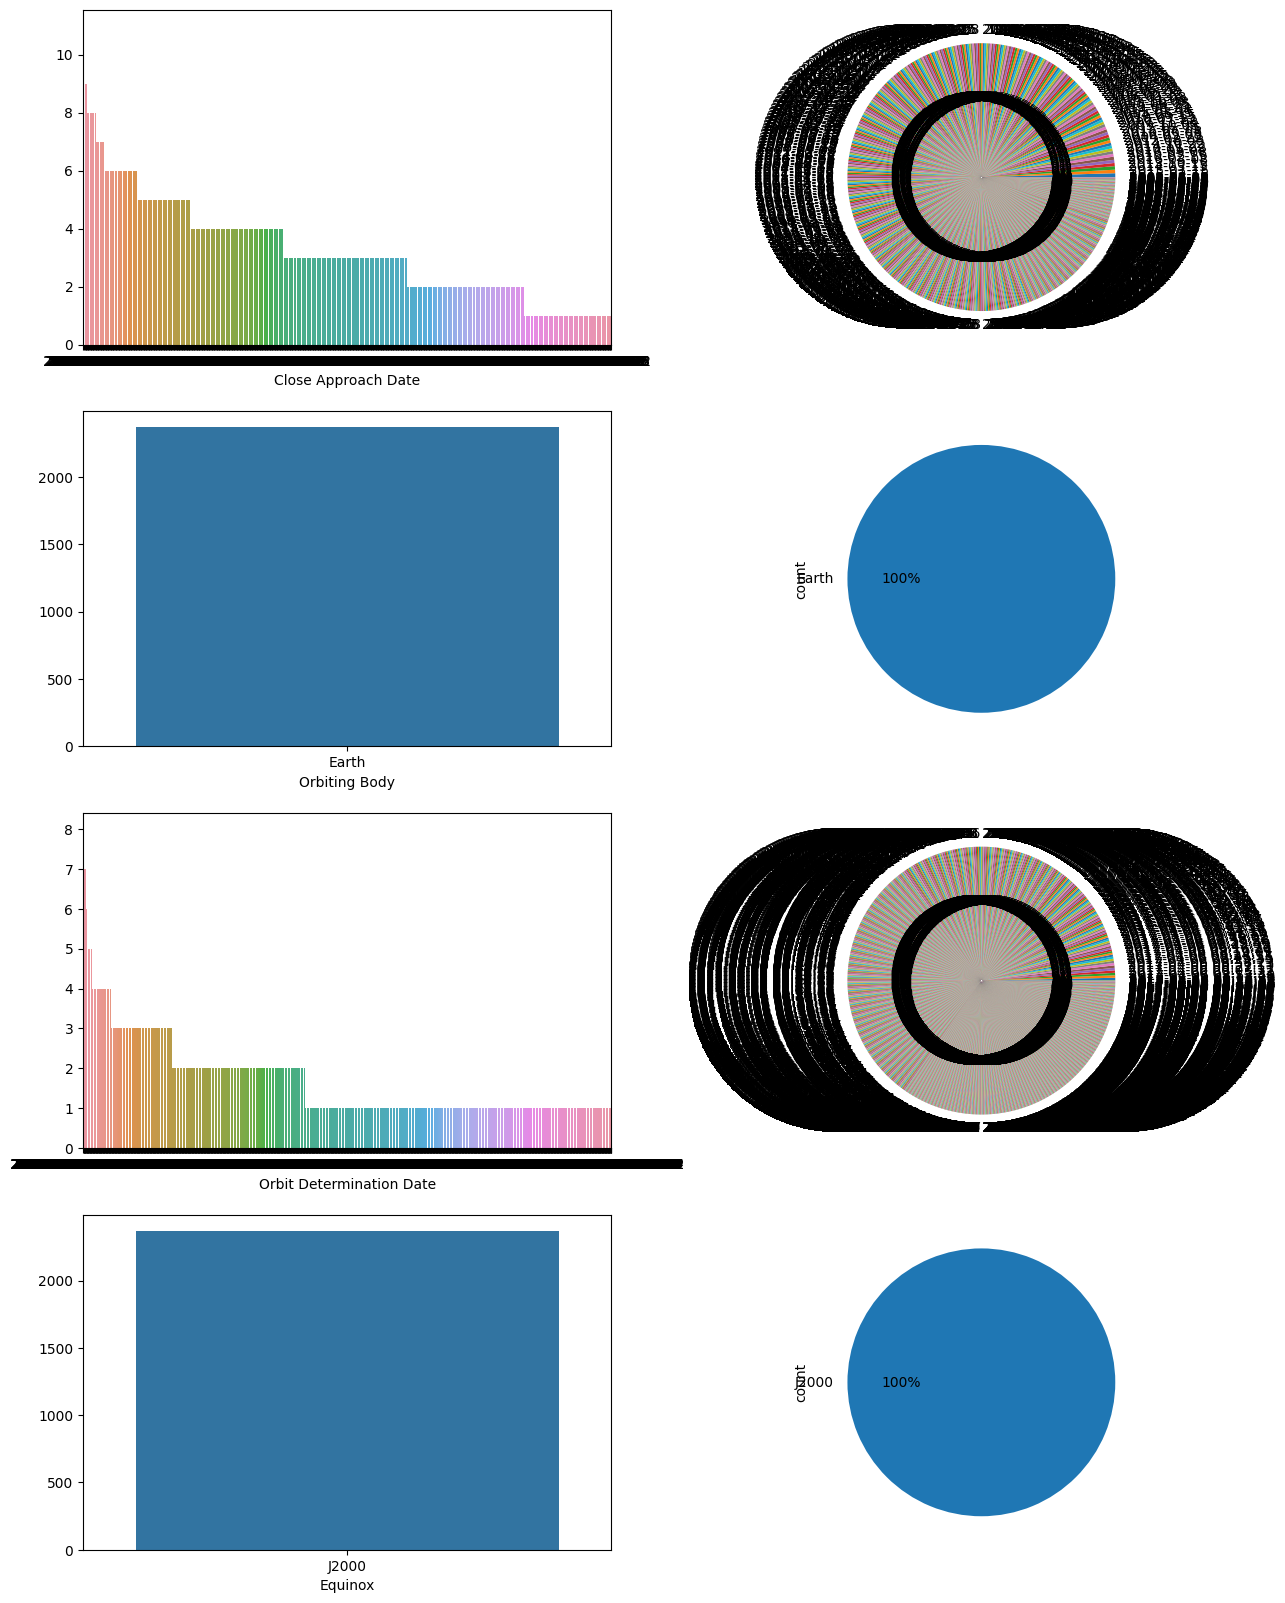

In [193]:
#visuvalising the data with pie chart and barplot
figure,axes=plt.subplots(4,2,figsize=(15,20))
i=0
for col in cat_col:
    index=df[col].value_counts().index
    value=df[col].value_counts().values
    sns.barplot(x=index,y=value,ax=axes[i][0])
    df[col].value_counts().plot(kind='pie',autopct="%0.00f%%",ax=axes[i][1])
    i=i+1

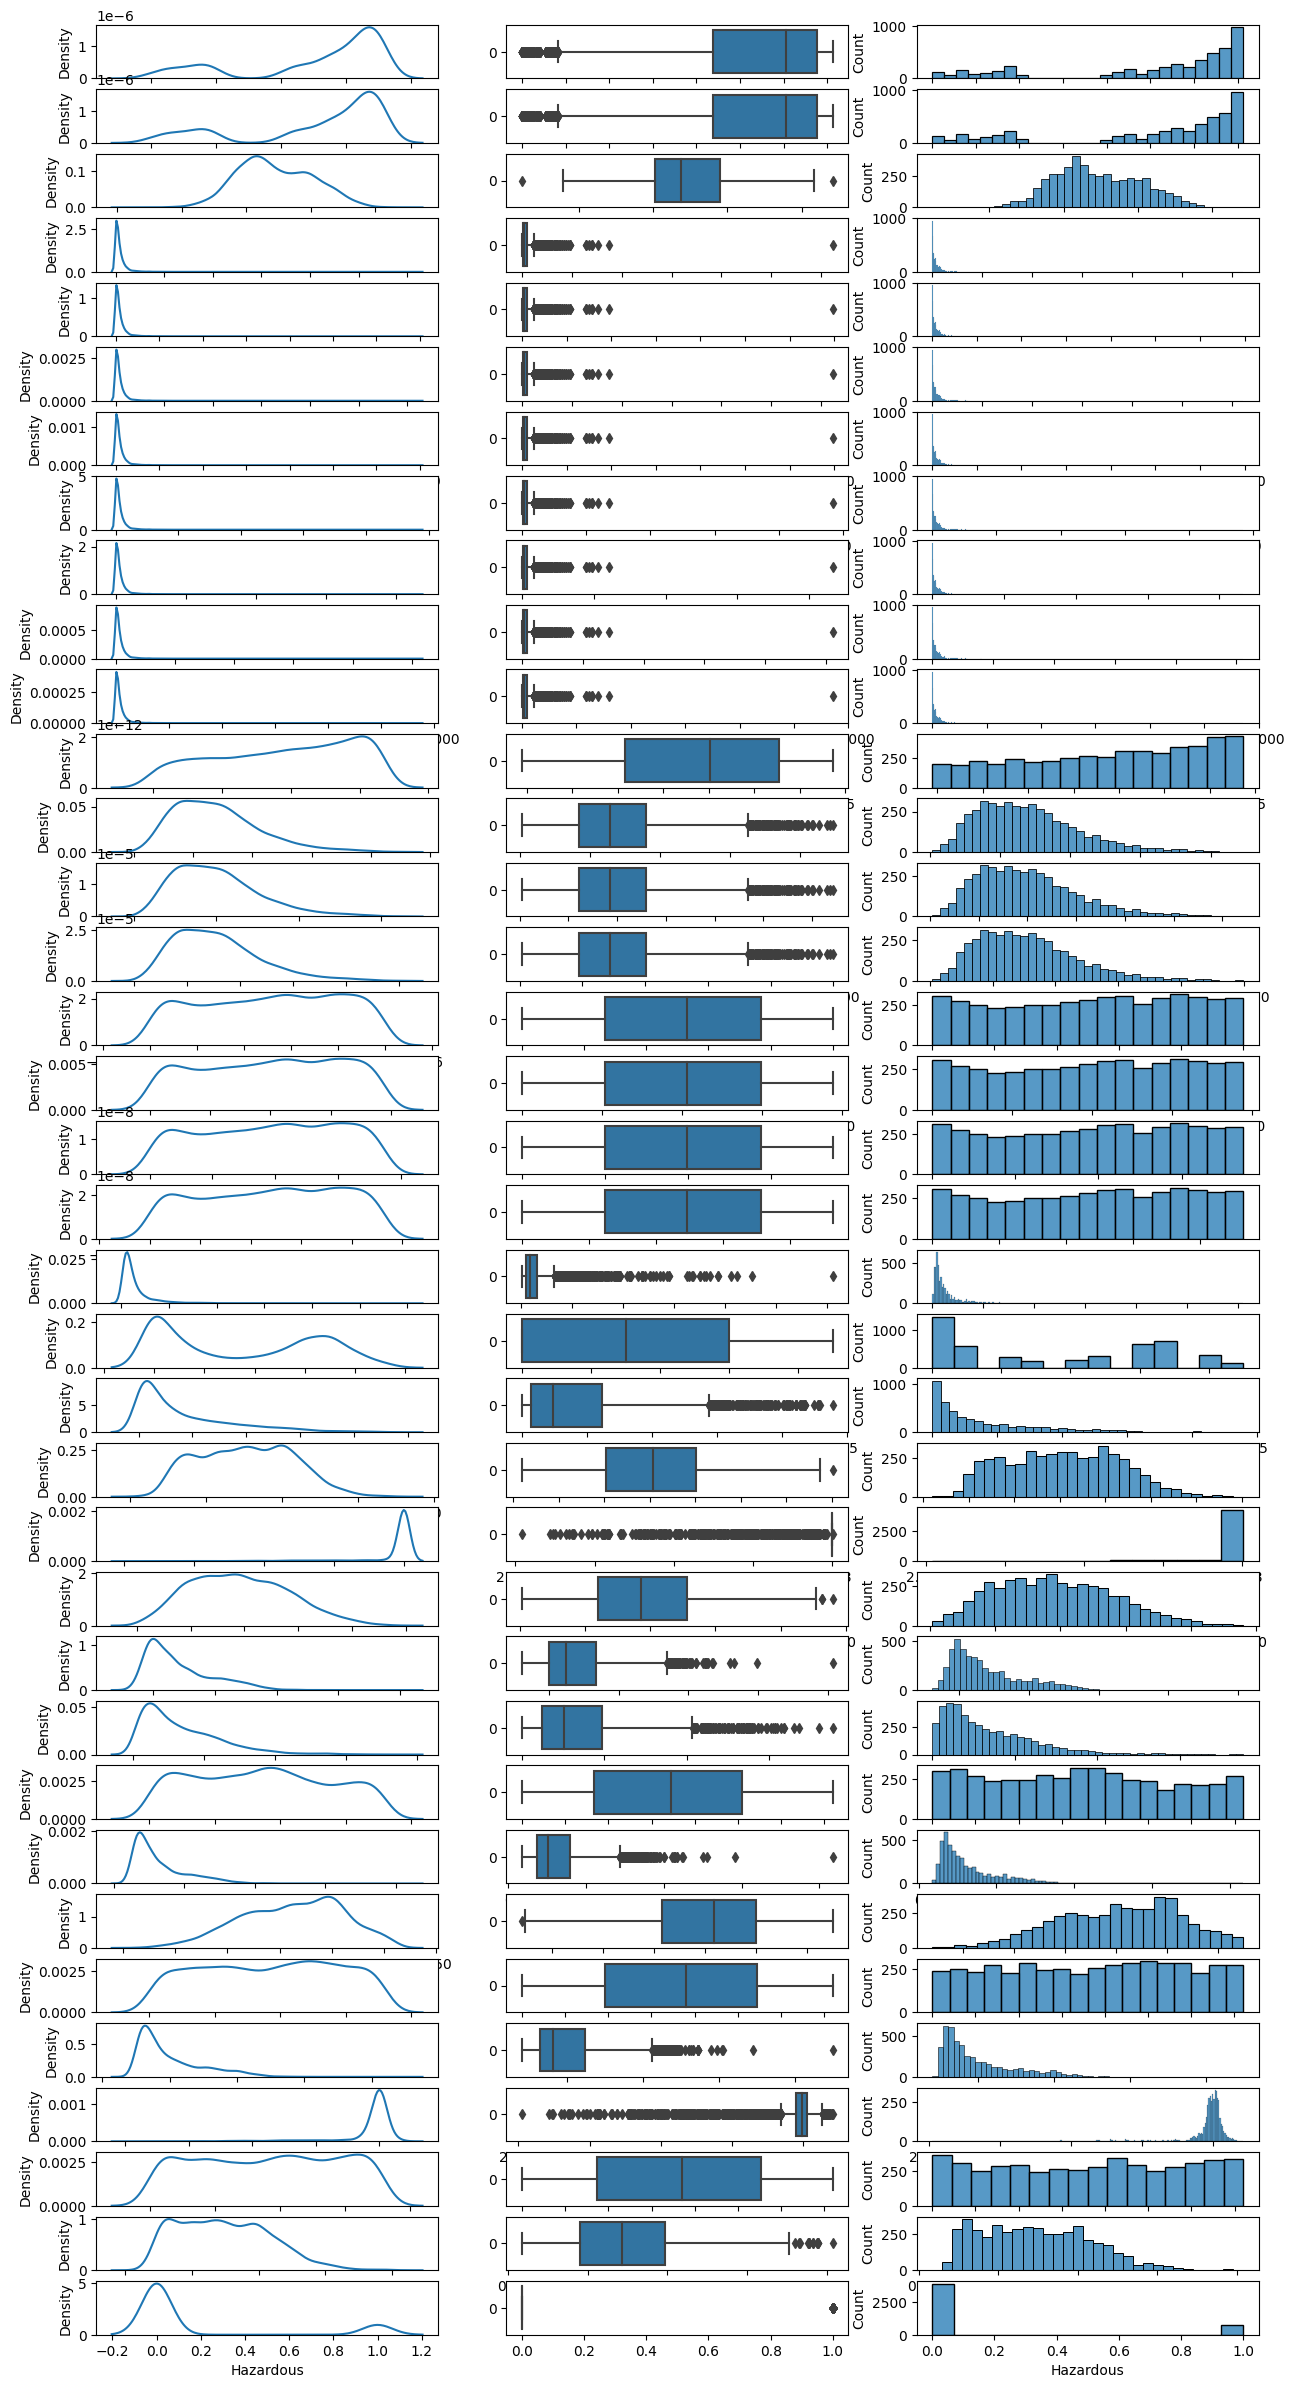

In [ ]:
#visuvalising the data with histplot, distplot and boxplot
figure,axes=plt.subplots(36,3,figsize=(15,30))
i=0
for col in numeric_cols:
    sns.distplot(df[col],hist=False,ax=axes[i][0])
    sns.boxplot(df[col],orient='h',ax=axes[i][1])
    sns.histplot(df[col],ax=axes[i][2])
    i=i+1

In [162]:
for k,v in numeric_columns.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    v_col = v[(v >= lower_bound) & (v <= upper_bound)]
    # Dropping outliers from the original DataFrame
    df = df[df[k].isin(v_col)]
    # Calculate the percentage of outliers
    perc = (len(v) - len(v_col)) * 100 / len(df)
    print('Column {} outliers dropped: {:.2f}%'.format(k,perc))

Column Neo Reference ID outliers dropped: 8.14%
Column Name outliers dropped: 8.14%
Column Absolute Magnitude outliers dropped: 0.05%
Column Est Dia in KM(min) outliers dropped: 7.36%
Column Est Dia in KM(max) outliers dropped: 7.36%
Column Est Dia in M(min) outliers dropped: 7.36%
Column Est Dia in M(max) outliers dropped: 7.36%
Column Est Dia in Miles(min) outliers dropped: 7.36%
Column Est Dia in Miles(max) outliers dropped: 7.36%
Column Est Dia in Feet(min) outliers dropped: 7.36%
Column Est Dia in Feet(max) outliers dropped: 7.36%
Column Epoch Date Close Approach outliers dropped: 0.00%
Column Relative Velocity km per sec outliers dropped: 2.43%
Column Relative Velocity km per hr outliers dropped: 2.43%
Column Miles per hour outliers dropped: 2.43%
Column Miss Dist.(Astronomical) outliers dropped: 0.00%
Column Miss Dist.(lunar) outliers dropped: 0.00%
Column Miss Dist.(kilometers) outliers dropped: 0.00%
Column Miss Dist.(miles) outliers dropped: 0.00%
Column Orbit ID outliers dro

In [163]:
# Convert data into a DataFrame
df = pd.DataFrame(df)

# Filter out only numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate the first quartile (Q1) for each numerical column
q1 = numerical_cols.quantile(0.25)

# Calculate the third quartile (Q3) for each numerical column
q3 = numerical_cols.quantile(0.75)

# Calculate the interquartile range (IQR) for each numerical column
iqr = q3 - q1

print("First Quartile (Q1):")
print(q1)
print("\nThird Quartile (Q3):")
print(q3)
print("\nInterquartile Range (IQR):")
print(iqr)

First Quartile (Q1):
Neo Reference ID                3.297378e+06
Name                            3.297378e+06
Absolute Magnitude              2.090000e+01
Est Dia in KM(min)              2.783268e-02
Est Dia in KM(max)              6.223576e-02
Est Dia in M(min)               2.783268e+01
Est Dia in M(max)               6.223576e+01
Est Dia in Miles(min)           1.729442e-02
Est Dia in Miles(max)           3.867149e-02
Est Dia in Feet(min)            9.131456e+01
Est Dia in Feet(max)            2.041856e+02
Epoch Date Close Approach       1.005206e+12
Relative Velocity km per sec    7.993687e+00
Relative Velocity km per hr     2.877727e+04
Miles per hour                  1.788108e+04
Miss Dist.(Astronomical)        1.403916e-01
Miss Dist.(lunar)               5.461234e+01
Miss Dist.(kilometers)          2.100229e+07
Miss Dist.(miles)               1.305022e+07
Orbit ID                        9.000000e+00
Orbit Uncertainity              1.000000e+00
Minimum Orbit Intersection      1.

In [164]:
#Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Identify outliers for each numerical column
outliers = (numerical_cols < lower_bound) | (numerical_cols > upper_bound)

#Count the number of outliers in each numerical column
num_outliers = outliers.sum()

print("Number of outliers in each numerical column:")
print(num_outliers)

#Remove rows containing outliers
df = df[~outliers.any(axis=1)]

print("\nDataFrame after removing outliers:")
df

Number of outliers in each numerical column:
Neo Reference ID                356
Name                            356
Absolute Magnitude                0
Est Dia in KM(min)              125
Est Dia in KM(max)              125
Est Dia in M(min)               125
Est Dia in M(max)               125
Est Dia in Miles(min)           125
Est Dia in Miles(max)           125
Est Dia in Feet(min)            125
Est Dia in Feet(max)            125
Epoch Date Close Approach         0
Relative Velocity km per sec     24
Relative Velocity km per hr      24
Miles per hour                   24
Miss Dist.(Astronomical)          0
Miss Dist.(lunar)                 0
Miss Dist.(kilometers)            0
Miss Dist.(miles)                 0
Orbit ID                        140
Orbit Uncertainity                0
Minimum Orbit Intersection      113
Jupiter Tisserand Invariant       0
Epoch Osculation                  0
Eccentricity                      5
Semi Major Axis                  68
Inclination        

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
10,3444370,3444370,22.4,0.088015,0.196807,88.014652,196.806745,0.054690,0.122290,288.761991,...,117.111224,268.186165,0.426618,220.940371,1.201135,2.457996e+06,5.556806,1.342351,J2000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,3608620,3608620,23.6,0.050647,0.113250,50.647146,113.250461,0.031471,0.070371,166.165182,...,175.870458,369.779900,0.883224,320.137043,1.133252,2.458175e+06,189.698962,0.973552,J2000,False
4681,3662283,3662283,20.7,0.192555,0.430566,192.555078,430.566244,0.119648,0.267541,631.742403,...,145.035928,814.019755,0.592216,110.720210,2.820140,2.457597e+06,178.503886,0.442250,J2000,False
4683,3759295,3759295,28.2,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.7,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False


In [165]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
skewness = numeric_columns.apply(skew)
skewness

Neo Reference ID               -0.903660
Name                           -0.903660
Absolute Magnitude              0.271348
Est Dia in KM(min)              1.400389
Est Dia in KM(max)              1.400389
Est Dia in M(min)               1.400389
Est Dia in M(max)               1.400389
Est Dia in Miles(min)           1.400389
Est Dia in Miles(max)           1.400389
Est Dia in Feet(min)            1.400389
Est Dia in Feet(max)            1.400389
Epoch Date Close Approach      -0.292439
Relative Velocity km per sec    0.599768
Relative Velocity km per hr     0.599768
Miles per hour                  0.599768
Miss Dist.(Astronomical)       -0.019948
Miss Dist.(lunar)              -0.019948
Miss Dist.(kilometers)         -0.019948
Miss Dist.(miles)              -0.019948
Orbit ID                        1.124228
Orbit Uncertainity             -0.489265
Minimum Orbit Intersection      1.371869
Jupiter Tisserand Invariant    -0.071125
Epoch Osculation                     NaN
Eccentricity    

In [166]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)
num = pd.DataFrame(scaled_data,columns = numeric_cols.columns)

num

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,0.737324,0.737324,-0.897620,0.629748,0.629748,0.629748,0.629748,0.629748,0.629748,0.629748,...,0.660774,-0.566198,1.374728,0.585620,0.039941,-1.219614,0.761031,1.020935,0.819744,-0.884356
1,0.835987,0.835987,-1.025080,0.878408,0.878408,0.878408,0.878408,0.878408,0.878408,0.878408,...,-0.256990,2.199409,-0.322297,-0.298977,-0.397675,1.233698,-0.154383,-1.393319,-0.074219,-0.025612
2,-2.148476,-2.148476,1.566595,-0.932531,-0.932531,-0.932531,-0.932531,-0.932531,-0.932531,-0.932531,...,0.197320,-0.333961,-1.082123,0.125736,0.893422,-1.589285,-0.099373,-0.686383,-1.104625,-0.514520
3,-0.152562,-0.152562,-0.897620,0.629748,0.629748,0.629748,0.629748,0.629748,0.629748,0.629748,...,0.104425,0.763966,-0.819855,0.036741,0.814630,-0.251021,-0.179248,-1.265020,-0.453005,-0.426487
4,-0.485435,-0.485435,-0.557728,0.112518,0.112518,0.112518,0.112518,0.112518,0.112518,0.112518,...,-1.158389,1.553647,-0.509579,-1.058164,-1.814524,0.350015,-0.687733,-0.067315,-1.724675,1.649624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,0.290871,0.290871,-0.047891,-0.380466,-0.380466,-0.380466,-0.380466,-0.380466,-0.380466,-0.380466,...,-0.562275,1.750026,0.051705,-0.569027,0.404212,1.301256,-0.809959,1.111704,0.082381,0.406568
2365,0.544503,0.544503,-1.279998,1.491707,1.491707,1.491707,1.491707,1.491707,1.491707,1.491707,...,1.578328,1.641078,-0.242835,1.569828,-1.009853,-0.706936,2.227346,-2.697630,-0.027480,-1.384215
2366,1.003017,1.003017,1.906487,-0.968315,-0.968315,-0.968315,-0.968315,-0.968315,-0.968315,-0.968315,...,-0.357103,-0.648440,1.669428,-0.388931,0.954321,-1.364860,-0.772900,0.533536,0.997771,0.105123
2367,1.004998,1.004998,-0.430269,-0.037314,-0.037314,-0.037314,-0.037314,-0.037314,-0.037314,-0.037314,...,1.032568,-0.766390,-1.274570,0.972979,0.805270,0.865470,0.913976,1.935076,0.217827,-1.116430


In [167]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cat=df.select_dtypes(include=['object','bool'])
# #categorical_columns

Categorcial_Final=cat.apply(le.fit_transform).reset_index()
Categorcial_Final

,index,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,0,0,0,349,0,1
1,1,0,0,270,0,0
2,3,1,0,1168,0,0
3,4,1,0,784,0,1
4,10,2,0,862,0,0
...,...,...,...,...,...,...
2364,4680,737,0,596,0,0
2365,4681,737,0,448,0,0
2366,4683,737,0,77,0,0
2367,4684,737,0,75,0,0


In [168]:
final = pd.concat([Categorcial_Final,num],axis=1)

In [169]:
X = final.drop(['Hazardous'], axis =1)
y = final['Hazardous']

In [170]:
X.head()

,index,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,0,0,0,349,0,0.737324,0.737324,-0.897620,0.629748,0.629748,...,0.660774,-0.566198,1.374728,0.585620,0.039941,-1.219614,0.761031,1.020935,0.819744,-0.884356
1,1,0,0,270,0,0.835987,0.835987,-1.025080,0.878408,0.878408,...,-0.256990,2.199409,-0.322297,-0.298977,-0.397675,1.233698,-0.154383,-1.393319,-0.074219,-0.025612
2,3,1,0,1168,0,-2.148476,-2.148476,1.566595,-0.932531,-0.932531,...,0.197320,-0.333961,-1.082123,0.125736,0.893422,-1.589285,-0.099373,-0.686383,-1.104625,-0.514520
3,4,1,0,784,0,-0.152562,-0.152562,-0.897620,0.629748,0.629748,...,0.104425,0.763966,-0.819855,0.036741,0.814630,-0.251021,-0.179248,-1.265020,-0.453005,-0.426487
4,10,2,0,862,0,-0.485435,-0.485435,-0.557728,0.112518,0.112518,...,-1.158389,1.553647,-0.509579,-1.058164,-1.814524,0.350015,-0.687733,-0.067315,-1.724675,1.649624


In [171]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Hazardous, dtype: int64

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,roc_curve,recall_score,f1_score,confusion_matrix,classification_report

In [174]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [175]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [176]:
 log_reg.coef_

array([[ 2.95357081e-03, -2.43442062e-02,  0.00000000e+00,
        -1.71213680e-03,  0.00000000e+00, -3.41126375e-01,
        -3.41126375e-01, -8.05824311e-01,  8.35311512e-02,
         8.35311516e-02,  8.35311516e-02,  8.35311516e-02,
         8.35311508e-02,  8.35311515e-02,  8.35311516e-02,
         8.35311516e-02,  1.22866844e+00,  1.43175106e-01,
         1.43175106e-01,  1.43175106e-01,  3.05848475e-02,
         3.05848882e-02,  3.05848658e-02,  3.05848769e-02,
         6.33368848e-01, -1.02684260e+00, -3.16090000e+00,
        -2.03509608e-01,  0.00000000e+00, -1.37311005e-01,
        -3.88279953e-02,  5.25207370e-02, -4.88583906e-04,
        -9.53079584e-02, -7.81512302e-02, -2.06340840e-01,
        -1.66305117e-02, -1.13113137e-01,  3.32271576e-02,
        -2.44148831e-01]])

In [177]:
log_reg.intercept_

array([-0.63608995])

In [181]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [182]:
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9493670886075949
Precision: 0.8949925261584455


In [183]:
log_reg.pred_prob=log_reg.predict_proba(X_test)[0:10]
log_reg.pred_prob

array([[9.95905396e-01, 4.09460426e-03],
       [9.78769469e-01, 2.12305307e-02],
       [9.98838062e-01, 1.16193799e-03],
       [4.56148952e-02, 9.54385105e-01],
       [9.08014429e-01, 9.19855708e-02],
       [5.98220145e-01, 4.01779855e-01],
       [9.57495566e-01, 4.25044344e-02],
       [9.95711141e-01, 4.28885878e-03],
       [9.86243200e-01, 1.37568001e-02],
       [9.99985200e-01, 1.48002922e-05]])

In [184]:
log_reg100 = LogisticRegression(C=100, solver = 'liblinear', random_state=0)

In [185]:
log_reg100.fit(X_test,y_test)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [186]:
y_pred = y_pred = log_reg100.predict(X_test)

In [188]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [189]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.9774964838255977
Precision: 0.9484738870993294
Recall: 0.9101985123647605
Confusion Matrix:
 [[642   5]
 [ 11  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       647
           1       0.91      0.83      0.87        64

    accuracy                           0.98       711
   macro avg       0.95      0.91      0.93       711
weighted avg       0.98      0.98      0.98       711



In [190]:
y_pred_prob = log_reg.predict_proba(X_test)[0:10]

In [191]:
y_pred_prob 

array([[9.95905396e-01, 4.09460426e-03],
       [9.78769469e-01, 2.12305307e-02],
       [9.98838062e-01, 1.16193799e-03],
       [4.56148952e-02, 9.54385105e-01],
       [9.08014429e-01, 9.19855708e-02],
       [5.98220145e-01, 4.01779855e-01],
       [9.57495566e-01, 4.25044344e-02],
       [9.95711141e-01, 4.28885878e-03],
       [9.86243200e-01, 1.37568001e-02],
       [9.99985200e-01, 1.48002922e-05]])

In [194]:


y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - FALSE (0)', 'Prob of - TRUE (1)'])

y_pred_prob_df

,Prob of - FALSE (0),Prob of - TRUE (1)
0,0.995905,0.004095
1,0.978769,0.021231
2,0.998838,0.001162
3,0.045615,0.954385
4,0.908014,0.091986
5,0.598220,0.401780
6,0.957496,0.042504
7,0.995711,0.004289
8,0.986243,0.013757
9,0.999985,0.000015


In [195]:
y_pred1 = log_reg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

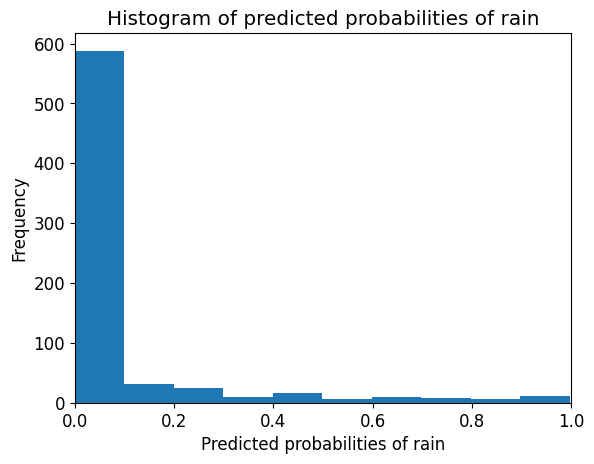

In [196]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of rain')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [205]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
x_test_scaled = scaler.transform(X_test)

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the classifier on the training data
rf_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9971870604781997
